In [28]:
import pandas as pd

<div class="alert alert-warning">
    
This tutorial uses the titanic data set, stored as CSV. For details on the titanic columns and how to read the data with pandas, see [tutorial 2 on read/write operations](./2_read_write.ipynb).

</div>

In [29]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<div class="alert alert-warning">
    
Air quality data about $NO_2$ and Particulate matter less than 2.5 micrometers is used as well, made available by [openaq](https://openaq.org) and using the [py-openaq](http://dhhagan.github.io/py-openaq/index.html) package. The `air_quality_long.csv` data set provides $NO_2$ and $pm25$ values for the measurement stations _FR04014_, _BETR801_ and _London Westminster_ in respectively Paris, Antwerp and London.

</div>

In [31]:
air_quality = pd.read_csv("../data/air_quality_long.csv", 
                          index_col="date.utc", parse_dates=True)
air_quality.head()

city country location parameter  value   unit
date.utc                                                                     
2019-06-18 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.0  µg/m³
2019-06-17 08:00:00+00:00  Antwerpen      BE  BETR801      pm25    6.5  µg/m³
2019-06-17 07:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.5  µg/m³
2019-06-17 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   16.0  µg/m³
2019-06-17 05:00:00+00:00  Antwerpen      BE  BETR801      pm25    7.5  µg/m³

<div class="alert alert-warning">
    
The air-quality data set has the following columns:

- city: city where the sensor is used, either Paris, Antwerp or London
- country: country where the sensor is used, either FR, BE or GB
- location: the id of the sensor, either _FR04014_, _BETR801_ or _London Westminster_
- parameter: the parameter measured by the sensor, either $NO_2$ or Particulate matter
- value: the measured value
- unit: the unit of the measured parameter, in this case 'µg/m³'

and the index of the `DataFrame` is `datetime`, the datetime of the measurement.

</div>

<div class="alert alert-info">
    
__Note__: The air-quality data is provided in a so-called _long format_ data representation with each observation on a separate row and each variable a separate column of the data table. The long/narrow format is also known as the [_tidy_ data format](https://www.jstatsoft.org/article/view/v059i10).
</div>

##  How to reshape the layout of tables?

### Sort table rows

> I want to sort the titanic data according to the age of the passengers.

In [39]:
titanic.sort_values(by="Age").head()

PassengerId  Survived  Pclass                             Name     Sex  \
803          804         1       3  Thomas, Master. Assad Alexander    male   
755          756         1       2        Hamalainen, Master. Viljo    male   
644          645         1       3           Baclini, Miss. Eugenie  female   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
78            79         1       2    Caldwell, Master. Alden Gates    male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
803  0.42      0      1    2625   8.5167   NaN        C  
755  0.67      1      1  250649  14.5000   NaN        S  
644  0.75      2      1    2666  19.2583   NaN        C  
469  0.75      2      1    2666  19.2583   NaN        C  
78   0.83      0      2  248738  29.0000   NaN        S

> I want to sort the titanic data according to the cabin class and age in descending order.

In [40]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

PassengerId  Survived  Pclass                       Name     Sex   Age  \
851          852         0       3        Svensson, Mr. Johan    male  74.0   
116          117         0       3       Connors, Mr. Patrick    male  70.5   
280          281         0       3           Duane, Mr. Frank    male  65.0   
483          484         1       3     Turkula, Mrs. (Hedwig)  female  63.0   
326          327         0       3  Nysveen, Mr. Johan Hansen    male  61.0   

     SibSp  Parch  Ticket    Fare Cabin Embarked  
851      0      0  347060  7.7750   NaN        S  
116      0      0  370369  7.7500   NaN        Q  
280      0      0  336439  7.7500   NaN        Q  
483      0      0    4134  9.5875   NaN        S  
326      0      0  345364  6.2375   NaN        S

With `sort_values`, the rows in the table are sorted according to the defined column(s). The index will follow the row order.

__To user guide:__ More details about sorting of tables is provided in :ref:`basics.sorting`.

### Long to wide table format

Let's use a small subset of the air quality data set. We focus on $NO_2$ data and only use the first two measurements of each location (i.e. the head of each group). The subset of data will be called `no2_subset`

In [41]:
no2 = air_quality[air_quality["parameter"] == "no2"] # filter for no2 data only

In [42]:
no2_subset = no2.sort_index().groupby(["location"]).head(2) # use 2 measurements (head) for each location (groupby)
no2_subset

city country            location parameter  \
date.utc                                                                     
2019-04-09 01:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 01:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 02:00:00+00:00     London      GB  London Westminster       no2   
2019-04-09 02:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 02:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 03:00:00+00:00     London      GB  London Westminster       no2   

                           value   unit  
date.utc                                 
2019-04-09 01:00:00+00:00   22.5  µg/m³  
2019-04-09 01:00:00+00:00   24.4  µg/m³  
2019-04-09 02:00:00+00:00   67.0  µg/m³  
2019-04-09 02:00:00+00:00   53.5  µg/m³  
2019-04-09 02:00:00+00:00   27.4  µg/m³  
2019-04-09 03:00:00+00:00   67.0  µg/m³

![](../schemas/07_pivot.svg)

> I want the values for the three stations as separate columns next to each other

In [43]:
no2_subset.pivot(columns="location", values="value")

location                   BETR801  FR04014  London Westminster
date.utc                                                       
2019-04-09 01:00:00+00:00     22.5     24.4                 NaN
2019-04-09 02:00:00+00:00     53.5     27.4                67.0
2019-04-09 03:00:00+00:00      NaN      NaN                67.0

The `pivot` function is purely reshaping of the data: a single value for each index/column combination is required. 

As Pandas support plotting of multiple columns (see [plotting tutorial](./4_plotting.ipynb)) out of the box, the conversion from _long_ to _wide_ table format enables the plotting of the different time series at the same time:

In [44]:
no2.head()

city country location parameter  value   unit
date.utc                                                                 
2019-06-21 00:00:00+00:00  Paris      FR  FR04014       no2   20.0  µg/m³
2019-06-20 23:00:00+00:00  Paris      FR  FR04014       no2   21.8  µg/m³
2019-06-20 22:00:00+00:00  Paris      FR  FR04014       no2   26.5  µg/m³
2019-06-20 21:00:00+00:00  Paris      FR  FR04014       no2   24.9  µg/m³
2019-06-20 20:00:00+00:00  Paris      FR  FR04014       no2   21.4  µg/m³

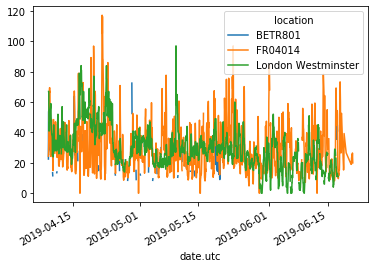

In [45]:
no2.pivot(columns="location", values="value").plot()

<div class="alert alert-info">
    
__Note__: When the `index` parameter is not defined, the existing index (row labels) is used.

</div>

__To user guide:__ For more information about `pivot`, see :ref:`reshaping.reshaping`

### Pivot table

![](../schemas/07_pivot_table.svg)

> I want the mean concentrations for $NO_2$ and $PM_{2.5}$ in each of the stations in table form

In [46]:
air_quality.pivot_table(values="value", index="location", 
                        columns="parameter", aggfunc="mean")

parameter                 no2       pm25
location                                
BETR801             26.950920  23.169492
FR04014             29.374284        NaN
London Westminster  29.740050  13.443568

In the case of `pivot`, the data is only rearranged. When multiple values need to be aggregated (in this specific case, the values on different time steps) `pivot_table` can be used, providing an aggregation function (e.g. mean) on how to combine these values.

Pivot table is a well known concept in spreadsheet software. When interested in summary columns for each variable separately as well, put the `margin` parameter to `True`:

In [47]:
air_quality.pivot_table(values="value", index="location", 
                        columns="parameter", aggfunc="mean",
                        margins=True)

parameter                 no2       pm25        All
location                                           
BETR801             26.950920  23.169492  24.982353
FR04014             29.374284        NaN  29.374284
London Westminster  29.740050  13.443568  21.491708
All                 29.430316  14.386849  24.222743

__To user guide:__ For more information about `pivot_table`, see :ref:`reshaping.pivot`

<div class="alert alert-info">
    
__Note__: If you're wondering, `pivot_table` is indeed directly linked to `groupby`. The same values can be calculated by grouping on both `parameter` and `location`: 

    air_quality.groupby(["parameter", "location"]).mean()
    
__To user guide:__ Have a look at `groupby` in combination with `unstack` at  [:ref:`TODO LABEL`](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#combining-with-stats-and-groupby)

</div>

### Wide to long format

Starting again from the wide format table created in the previous section:

In [48]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

location                  date.utc  BETR801  FR04014  London Westminster
0        2019-04-09 01:00:00+00:00     22.5     24.4                 NaN
1        2019-04-09 02:00:00+00:00     53.5     27.4                67.0
2        2019-04-09 03:00:00+00:00     54.5     34.2                67.0
3        2019-04-09 04:00:00+00:00     34.5     48.5                41.0
4        2019-04-09 05:00:00+00:00     46.5     59.5                41.0

![](../schemas/07_melt.svg)

> I want to collect all air quality $NO_2$ measurements in a single column (long format)

In [49]:
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2.head()

date.utc location  value
0 2019-04-09 01:00:00+00:00  BETR801   22.5
1 2019-04-09 02:00:00+00:00  BETR801   53.5
2 2019-04-09 03:00:00+00:00  BETR801   54.5
3 2019-04-09 04:00:00+00:00  BETR801   34.5
4 2019-04-09 05:00:00+00:00  BETR801   46.5

The solution is the short version on how to apply `melt`. The method will _melt_ all columns NOT mentioned in `id_vars` together into two columns: A columns with the column header names and a column with the values itself. The latter column gets by default the name `value`.

The `melt` method can be defined in more detail:

In [50]:
no_2 = no2_pivoted.melt(id_vars="date.utc", 
                        value_vars=["BETR801", "FR04014", "London Westminster"],
                        value_name="NO_2",
                        var_name="id_location")
no_2.head()

date.utc id_location  NO_2
0 2019-04-09 01:00:00+00:00     BETR801  22.5
1 2019-04-09 02:00:00+00:00     BETR801  53.5
2 2019-04-09 03:00:00+00:00     BETR801  54.5
3 2019-04-09 04:00:00+00:00     BETR801  34.5
4 2019-04-09 05:00:00+00:00     BETR801  46.5

The result in the same, but in more detail defined:

- `value_vars` defines explicitly which columns to _melt_ together
- `value_name` provides a custom column name for the values column instead of the default columns name `value`
- `var_name` provides a custom column name for the columns collecting the column header names. Otherwise it takes the index name or a default `variable`

Hence, the arguments `value_name` and `var_name` are just user-defined names for the two generated columns. The columns to melt are defined by `id_vars` and `value_vars`.

__To user guide:__ Conversion from wide to long format with `melt` is explained in :ref:`reshaping.melt`.

## REMEMBER

- Sorting by one or more columns is supported by `sort_values`
- The `pivot` function is purely restructering of the data, `pivot_table` supports aggregations
- The reverse of `pivot` (long to wide format) is `melt` (wide to long format)

__To user guide:__ More information on reshaping and pivoting is provided in :ref:`reshaping`.